# 1. Install and check dependencies and setup 

In [ ]:
!pip list

# 1.1 Import required libaries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import imghdr
import os

In [2]:
os.path.join('data','happy')

'data\\happy'

In [3]:
os.listdir('data')

['happy', 'sad']

# 1.2 Remove dodgy images 

In [4]:
data_dir  = 'data'
img_formats = ['jpg','jpeg','bmp','png']

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(img_path)
            form = imghdr.what(img_path)
            if form not in img_formats:
                print('Image format {} is not acceptable'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Image format {} has issue'.format(img_path))

# 1.3 Load data

In [7]:
import numpy as np

In [8]:
data = tf.keras.utils.image_dataset_from_directory

In [9]:
# Dataset generator
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
# Access the data generator through data pipeline 
data_iterator = data.as_numpy_iterator()

In [11]:
# Get another batch
batch = data_iterator.next()

In [12]:
# Image represented as numpy array
batch[0].shape

(32, 256, 256, 3)

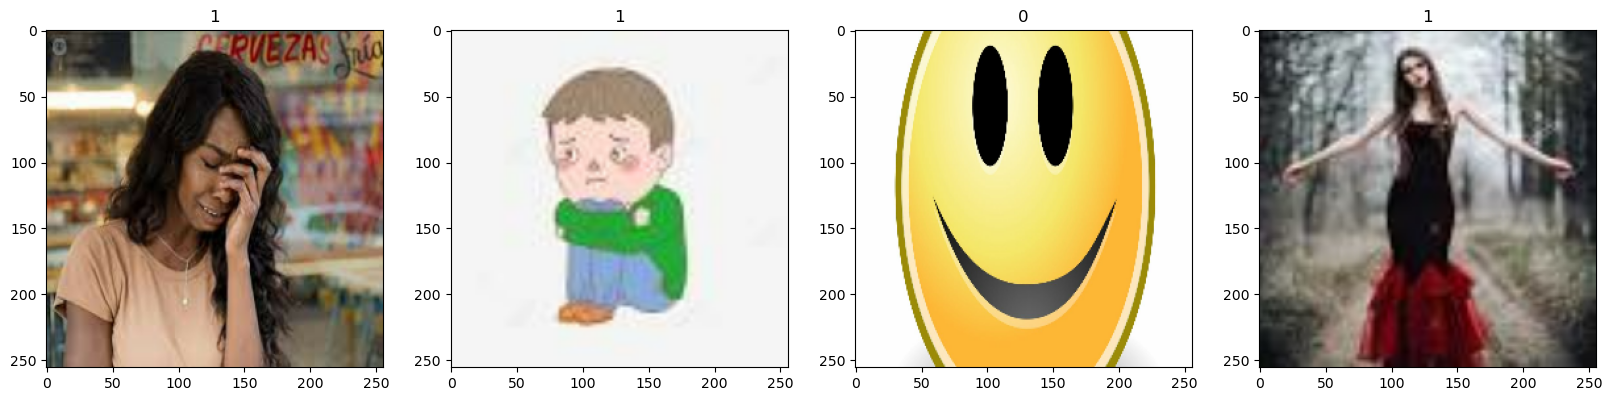

In [13]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

In [14]:
#Scale data 
data = data.map(lambda x,y: (x/255 , y))

In [15]:
scaled_iterator = data.as_numpy_iterator().next()

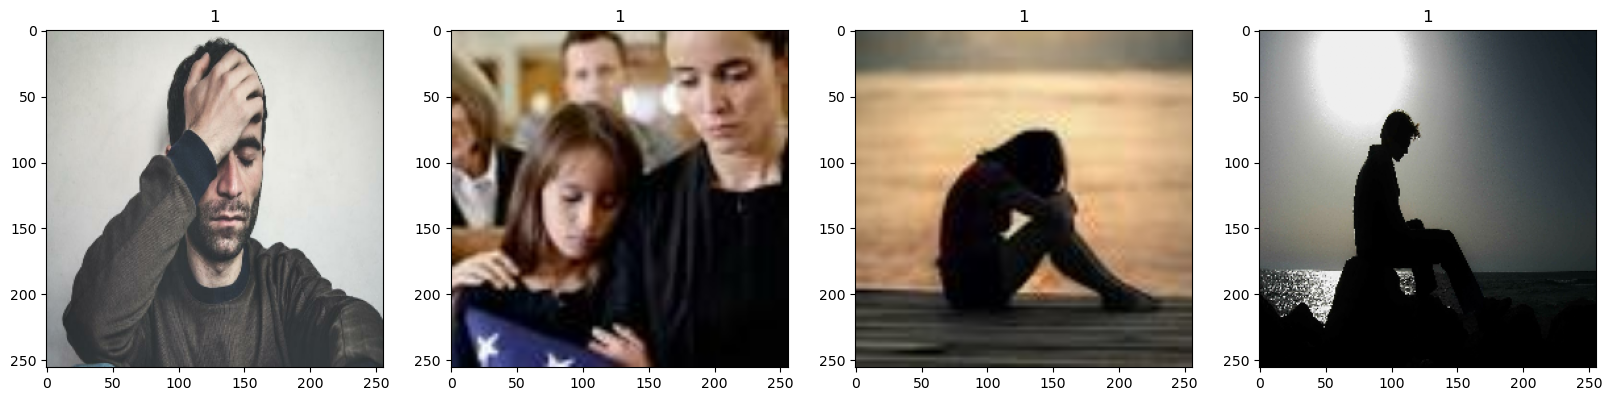

In [16]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(scaled_iterator[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_iterator[1][idx])

In [17]:
len(data)
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [18]:
train_size + val_size + test_size

10

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

# 3. Deep learning model

# 3.1 Build the Deep learning model

In [20]:
# Import required libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 3.2 Train the model

In [25]:
logdir ='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs =20, validation_data =val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 0.7743 - accuracy: 0.5223 - val_loss: 0.6730 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6572 - accuracy: 0.5446 - val_loss: 0.6157 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5801 - accuracy: 0.6786 - val_loss: 0.5915 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5818 - accuracy: 0.6652 - val_loss: 0.4393 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5047 - accuracy: 0.7812 - val_loss: 0.4902 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 11s 1s/step - loss: 0.4163 - accuracy: 0.8750 - val_loss: 0.2898 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.3106 - accuracy: 0.8884 - val_loss: 0.1819 - val_accuracy: 0.9219
Epoch 8/20
7/7 [====================

In [28]:
hist.history

{'loss': [0.7742685675621033,
  0.6571952104568481,
  0.5801407694816589,
  0.5817989110946655,
  0.5047188401222229,
  0.4163200557231903,
  0.3106240928173065,
  0.25975531339645386,
  0.21948771178722382,
  0.15796807408332825,
  0.12707507610321045,
  0.08711912482976913,
  0.06793148070573807,
  0.05811187997460365,
  0.04285229369997978,
  0.05274122580885887,
  0.03151129186153412,
  0.04920157790184021,
  0.05198245868086815,
  0.04171215742826462],
 'accuracy': [0.5223214030265808,
  0.5446428656578064,
  0.6785714030265808,
  0.6651785969734192,
  0.78125,
  0.875,
  0.8883928656578064,
  0.9151785969734192,
  0.9464285969734192,
  0.9598214030265808,
  0.9508928656578064,
  0.9732142686843872,
  0.9866071343421936,
  0.9732142686843872,
  0.9910714030265808,
  0.9866071343421936,
  0.9910714030265808,
  0.9821428656578064,
  0.9866071343421936,
  0.9866071343421936],
 'val_loss': [0.6730021238327026,
  0.6156546473503113,
  0.5914745330810547,
  0.4393232464790344,
  0.49023

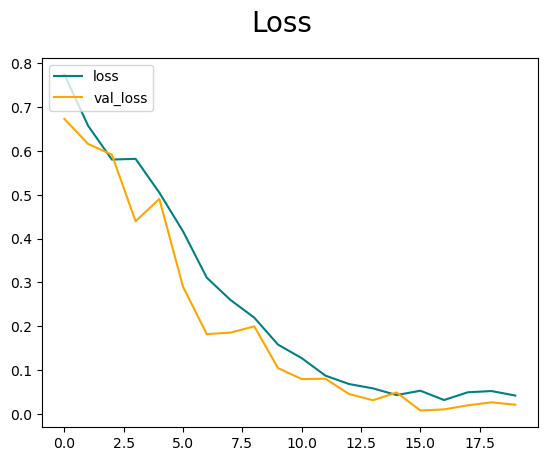

In [29]:
# Plotting loss and validation loss 
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20 )
plt.legend(loc = 'upper left')
plt.show()

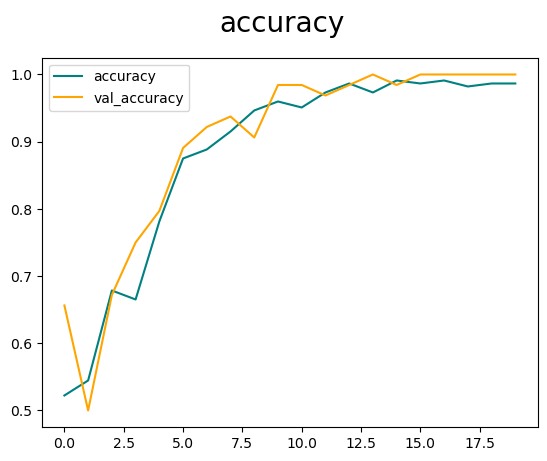

In [31]:
# Plotting accuracy and validation accuracy 
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20 )
plt.legend(loc = 'upper left')
plt.show()

# 4. Evaluate performance 

# 4.1 Evaluate 

In [33]:
# Import required libraries for evaluation of a classification problem
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, Y = batch
    yhat = model.predict(X)
    pre.update_state(Y, yhat)
    re.update_state(Y, yhat)
    acc.update_state(Y, yhat)

1/1 [==============================] - 0s 91ms/step


In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 4.2 Test

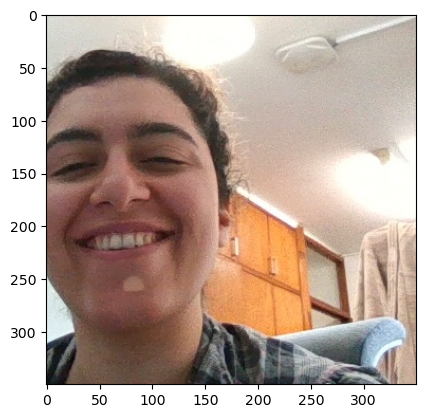

In [47]:
img = cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

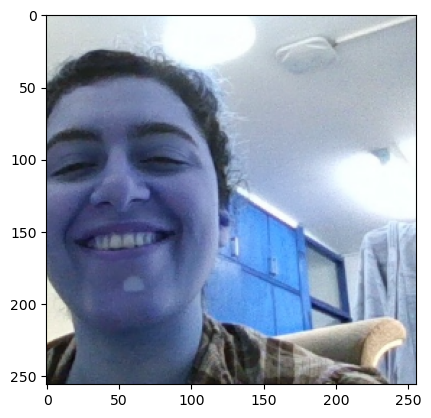

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [57]:
yhat

array([[0.06244752]], dtype=float32)

In [58]:
if yhat<0.5:
    print(f'Predicted class for this image is happy.')
else:
    print(f'Predicted class for this image is sad.')

Predicted class for this image is happy


# 5. Save the model (Final step!)

In [59]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('Imageclassifier_happysad.h5'))

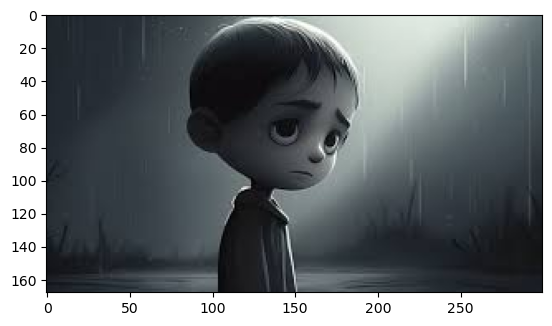

In [70]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

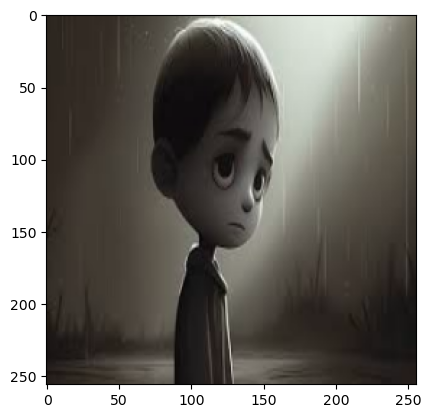

In [71]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 28ms/step


In [73]:
yhat

array([[1.]], dtype=float32)

In [74]:
if yhat<0.5:
    print(f'Predicted class for this image is happy.')
else:
    print(f'Predicted class for this image is sad.')

Predicted class for this image is sad.
